In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('datadiabetes.csv')

In [5]:
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [9]:
print(df.isnull().sum())
print(f"Duplicados: {df.duplicated().sum()}")

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64
Duplicados: 0


In [12]:
summary = df.describe().T
modes = df.mode().iloc[0]
summary['mode'] = modes
print(summary)

            count           mean           std    min       25%      50%  \
ID         1000.0     340.500000  2.403977e+02    1.0    125.75    300.5   
No_Pation  1000.0  270551.408000  3.380758e+06  123.0  24063.75  34395.5   
AGE        1000.0      53.528000  8.799241e+00   20.0     51.00     55.0   
Urea       1000.0       5.124743  2.935165e+00    0.5      3.70      4.6   
Cr         1000.0      68.943000  5.998475e+01    6.0     48.00     60.0   
HbA1c      1000.0       8.281160  2.534003e+00    0.9      6.50      8.0   
Chol       1000.0       4.862820  1.301738e+00    0.0      4.00      4.8   
TG         1000.0       2.349610  1.401176e+00    0.3      1.50      2.0   
HDL        1000.0       1.204750  6.604136e-01    0.2      0.90      1.1   
LDL        1000.0       2.609790  1.115102e+00    0.3      1.80      2.5   
VLDL       1000.0       1.854700  3.663599e+00    0.1      0.70      0.9   
BMI        1000.0      29.578020  4.962388e+00   19.0     26.00     30.0   

           

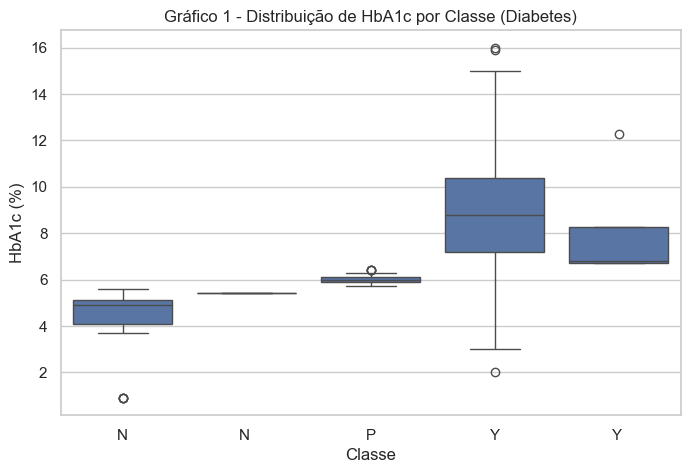

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='CLASS', y='HbA1c', data=df)
plt.title('Gráfico 1 - Distribuição de HbA1c por Classe (Diabetes)')
plt.xlabel('Classe')
plt.ylabel('HbA1c (%)')
plt.show()


In [22]:
## Comparar os níveis de hemoglobina glicada (HbA1c) entre pacientes com diferentes estágios de diabetes (não diabético, pré-diabético, diabético).
## O HbA1c é um dos principais indicadores clínicos de diabetes. Ao utilizar um boxplot segmentado pela variável CLASS, é possível observar que:
## Pacientes diabéticos (Y) apresentam valores de HbA1c claramente mais altos e Existe uma progressão natural entre as classes N, P e Y

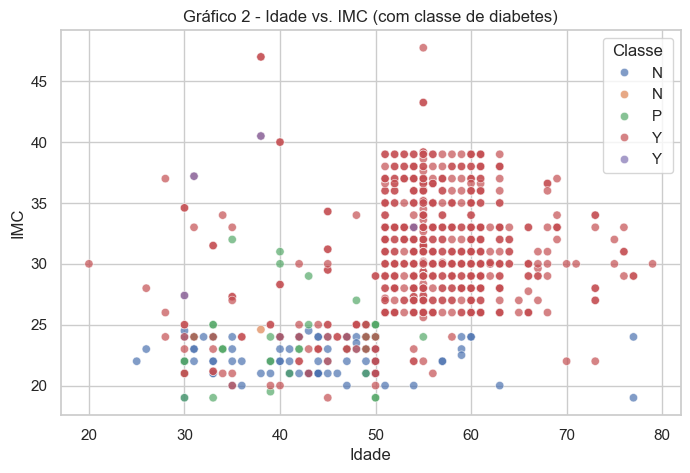

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AGE', y='BMI', hue='CLASS', data=df, alpha=0.7)
plt.title('Gráfico 2 - Idade vs. IMC (com classe de diabetes)')
plt.xlabel('Idade')
plt.ylabel('IMC')
plt.legend(title='Classe')
plt.show()

In [23]:
## Explorar se há alguma relação entre a idade e o índice de massa corporal (BMI) e como essas características se distribuem entre as classes de diabetes.
## pacientes com idade mais avançada e IMC mais elevado tendem a estar na classe diabética.
## Não há uma relação linear clara, mas existem padrões interessantes, como: Classe Y concentrada em faixas de idade mais elevadas, Porém, há uma taxa de diabetes alta mesmo apresentando um o IMC normal

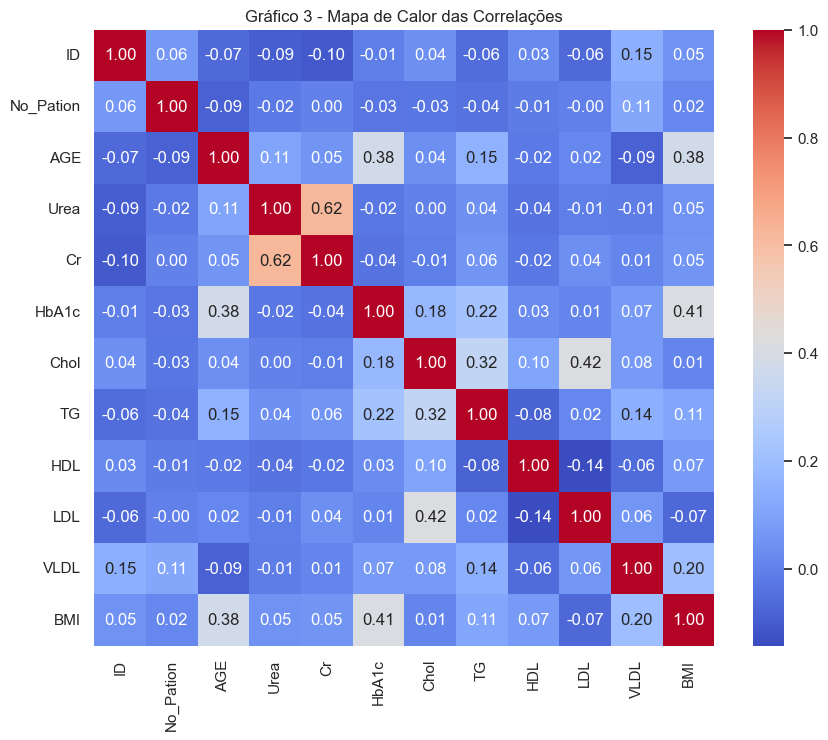

In [16]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico 3 - Mapa de Calor das Correlações')
plt.show()

In [ ]:
## Verificar o grau de correlação entre variáveis numéricas.

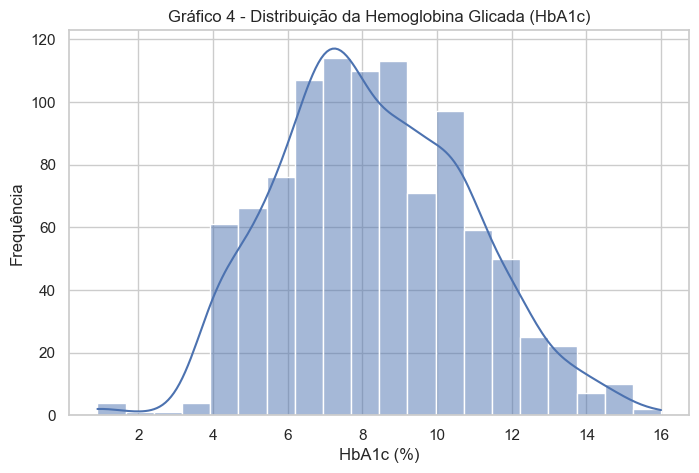

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['HbA1c'], kde=True, bins=20)
plt.title('Gráfico 4 - Distribuição da Hemoglobina Glicada (HbA1c)')
plt.xlabel('HbA1c (%)')
plt.ylabel('Frequência')
plt.show()

In [ ]:
## Ver a distribuição da variável HbA1c na população total da amostra.
## A maioria dos pacientes tem valores entre 4 e 6%, considerados normais ou pré-diabéticos e Há uma cauda de valores altos indicando a presença de pacientes com diabetes avançado.

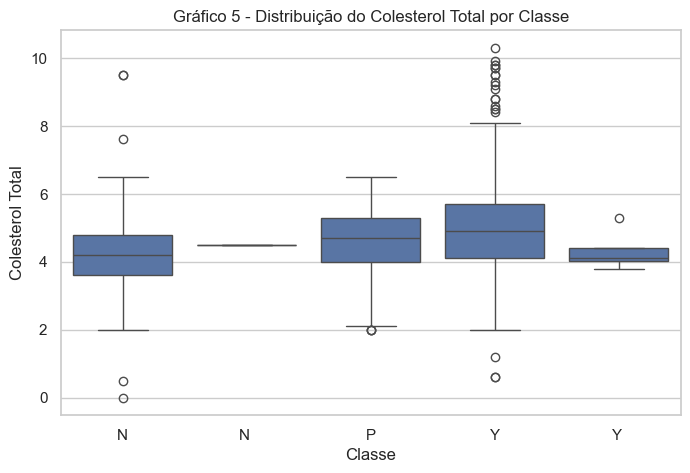

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='CLASS', y='Chol', data=df)
plt.title('Gráfico 5 - Distribuição do Colesterol Total por Classe')
plt.xlabel('Classe')
plt.ylabel('Colesterol Total')
plt.show()

In [ ]:
## Avaliar se o colesterol total tem alguma relação com a condição diabética
## A sobreposição é alta
## O colesterol total, por si só, não parece ser um bom preditor direto de diabetes.

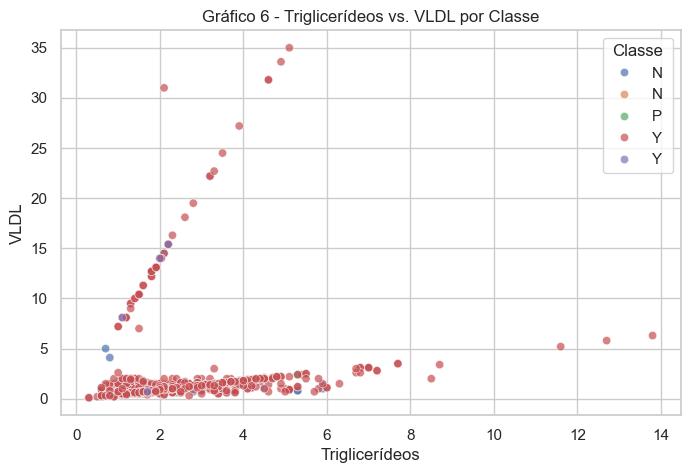

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TG', y='VLDL', hue='CLASS', data=df, alpha=0.7)
plt.title('Gráfico 6 - Triglicerídeos vs. VLDL por Classe')
plt.xlabel('Triglicerídeos')
plt.ylabel('VLDL')
plt.legend(title='Classe')
plt.show()

In [ ]:
## Verificar a relação entre duas variáveis que já se mostraram correlacionadas.
## Triglicerídeos e VLDL são praticamente proporcionais.

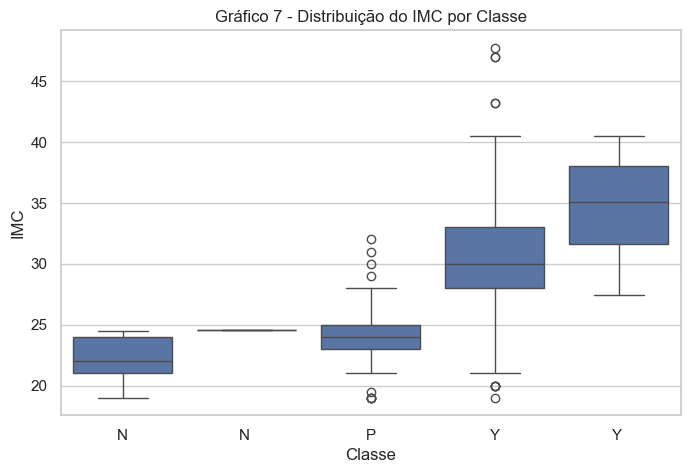

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='CLASS', y='BMI', data=df)
plt.title('Gráfico 7 - Distribuição do IMC por Classe')
plt.xlabel('Classe')
plt.ylabel('IMC')
plt.show()

In [24]:
## Investigar a relação entre o IMC (índice de massa corporal) e a classe diabética
## Pacientes da classe Y tendem a ter IMC mais elevado.